In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, mean_squared_error



# Weather Data -- Binary

In [ ]:
df = pd.read_csv('weatherHistory.csv', header=None, sep='\n')

df = df[0].str.split(',', expand=True)

In [ ]:
df.columns = df.iloc[0]

In [ ]:
df = df.iloc[1:, :]

In [ ]:

df['Precip Type'].value_counts()

rain    85224
snow    10712
null      517
Name: Precip Type, dtype: int64

In [ ]:
df = df[df['Precip Type'].isin(['rain', 'snow'])]

In [ ]:

df['Precip Type'].value_counts()

rain    85224
snow    10712
Name: Precip Type, dtype: int64

In [ ]:
df['label'] = 0
df.loc[df['Precip Type']=='rain', 'label']=1

In [ ]:
df.label.value_counts()

1    85224
0    10712
Name: label, dtype: int64

# Ratings data

In [ ]:
epi_df = pd.read_csv('epi_r.csv', low_memory=False)

In [ ]:
epi_df.rating.std()

1.3408286917250363

In [ ]:
epi_df.iloc[:, 6:].describe()

,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,alabama,alaska,alcoholic,almond,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
count,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,...,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000
mean,0.000299,0.000050,0.000848,0.001346,0.000349,0.005436,0.000150,0.000100,0.041642,0.029124,...,0.001247,0.026332,0.000050,0.000299,0.014861,0.000150,0.000349,0.001396,0.000948,0.022741
std,0.017296,0.007062,0.029105,0.036671,0.018681,0.073530,0.012231,0.009987,0.199774,0.168159,...,0.035288,0.160123,0.007062,0.017296,0.121001,0.012231,0.018681,0.037343,0.030768,0.149080
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df_temp = epi_df.iloc[:,1:6]

In [ ]:
df_temp.describe()

,rating,calories,protein,fat,sodium
count,20052.000000,1.593500e+04,15890.000000,1.586900e+04,1.593300e+04
mean,3.714467,6.322958e+03,100.160793,3.468775e+02,6.225975e+03
std,1.340829,3.590460e+05,3840.318527,2.045611e+04,3.333182e+05
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
25%,3.750000,1.980000e+02,3.000000,7.000000e+00,8.000000e+01
50%,4.375000,3.310000e+02,8.000000,1.700000e+01,2.940000e+02
75%,4.375000,5.860000e+02,27.000000,3.300000e+01,7.110000e+02
max,5.000000,3.011122e+07,236489.000000,1.722763e+06,2.767511e+07


In [ ]:
df_temp.shape

(20052, 5)

In [ ]:
df_temp.dropna(inplace=True)

In [ ]:
df_temp.describe()

,rating,calories,protein,fat,sodium
count,15864.000000,1.586400e+04,15864.000000,1.586400e+04,1.586400e+04
mean,3.760952,6.350683e+03,100.324571,3.469868e+02,6.252742e+03
std,1.285518,3.598484e+05,3843.462312,2.045933e+04,3.340421e+05
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
25%,3.750000,1.990000e+02,3.000000,7.000000e+00,8.200000e+01
50%,4.375000,3.330000e+02,8.000000,1.700000e+01,2.960000e+02
75%,4.375000,5.872500e+02,27.000000,3.300000e+01,7.130000e+02
max,5.000000,3.011122e+07,236489.000000,1.722763e+06,2.767511e+07


In [ ]:
df_temp.corr()

,rating,calories,protein,fat,sodium
rating,1.000000,0.007855,0.013971,0.007235,0.008146
calories,0.007855,1.000000,0.742816,0.996538,0.996392
protein,0.013971,0.742816,1.000000,0.712194,0.749287
fat,0.007235,0.996538,0.712194,1.000000,0.986476
sodium,0.008146,0.996392,0.749287,0.986476,1.000000


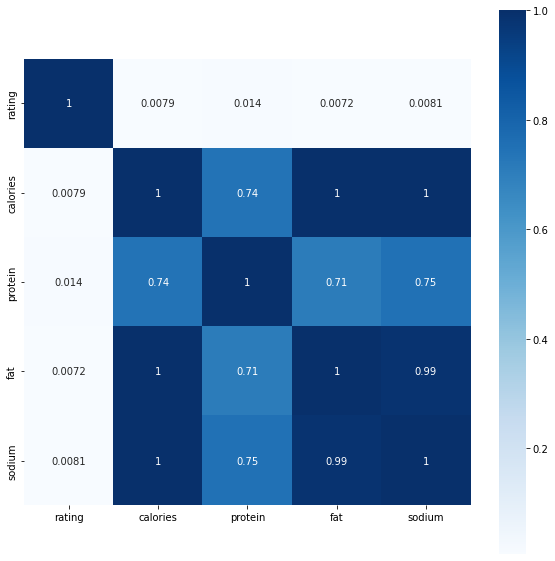

In [ ]:

correlation = df_temp.corr()
fig = plt.subplots(figsize=(10,10))
sns.heatmap(correlation,vmax=1,square=True,annot=True,cmap='Blues')

# Cyclists data


In [ ]:
bicycles = pd.read_csv('nyc-east-river-bicycle-counts.csv', low_memory=False)

In [ ]:
bicycles.Day

0      2016-04-01 00:00:00
1      2016-04-02 00:00:00
2      2016-04-03 00:00:00
3      2016-04-04 00:00:00
4      2016-04-05 00:00:00
              ...         
205    2016-04-26 00:00:00
206    2016-04-27 00:00:00
207    2016-04-28 00:00:00
208    2016-04-29 00:00:00
209    2016-04-30 00:00:00
Name: Day, Length: 210, dtype: object

In [ ]:
import datetime


# New Features

In [ ]:
bicycles.Day = bicycles.Day.apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

In [ ]:
bicycles.Day

0     2016-04-01
1     2016-04-02
2     2016-04-03
3     2016-04-04
4     2016-04-05
         ...    
205   2016-04-26
206   2016-04-27
207   2016-04-28
208   2016-04-29
209   2016-04-30
Name: Day, Length: 210, dtype: datetime64[ns]

In [ ]:
bicycles['weekend'] = 0
bicycles.loc[bicycles.Day.dt.weekday>=5, 'weekend']=1

Correlation between data

In [ ]:
bicycles.corr()

,Unnamed: 0,High Temp (°F),Low Temp (°F),Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total,weekend
Unnamed: 0,1.000000,0.070144,0.055420,0.100557,0.090508,0.096328,0.093006,0.095156,-0.006599
High Temp (°F),0.070144,1.000000,0.823853,0.739377,0.720175,0.764336,0.727825,0.743344,-0.107708
Low Temp (°F),0.055420,0.823853,1.000000,0.464550,0.465097,0.534212,0.475725,0.492124,-0.137974
Brooklyn Bridge,0.100557,0.739377,0.464550,1.000000,0.983148,0.980463,0.976991,0.989339,-0.263025
Manhattan Bridge,0.090508,0.720175,0.465097,0.983148,1.000000,0.989805,0.985867,0.996323,-0.343058
Williamsburg Bridge,0.096328,0.764336,0.534212,0.980463,0.989805,1.000000,0.988852,0.996639,-0.301703
Queensboro Bridge,0.093006,0.727825,0.475725,0.976991,0.985867,0.988852,1.000000,0.993391,-0.283479
Total,0.095156,0.743344,0.492124,0.989339,0.996323,0.996639,0.993391,1.000000,-0.305580
weekend,-0.006599,-0.107708,-0.137974,-0.263025,-0.343058,-0.301703,-0.283479,-0.305580,1.000000


In [ ]:
bicycles = bicycles[~(bicycles.Precipitation =='T')]
bicycles.loc[bicycles.Precipitation =='0.47 (S)', 'Precipitation'] = 0.47
bicycles.Precipitation = bicycles.Precipitation.astype(float)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
bicycles.corr()

,Unnamed: 0,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total,weekend
Unnamed: 0,1.000000,0.068401,0.052638,-0.033753,0.100455,0.090544,0.096174,0.093183,0.095115,-0.004282
High Temp (°F),0.068401,1.000000,0.805983,-0.334064,0.738824,0.727551,0.766709,0.737359,0.748040,-0.076106
Low Temp (°F),0.052638,0.805983,1.000000,-0.142855,0.449257,0.461594,0.525649,0.475111,0.485360,-0.104966
Precipitation,-0.033753,-0.334064,-0.142855,1.000000,-0.594789,-0.584712,-0.571189,-0.592933,-0.586797,0.001993
Brooklyn Bridge,0.100455,0.738824,0.449257,-0.594789,1.000000,0.983749,0.980156,0.977857,0.989459,-0.250859
Manhattan Bridge,0.090544,0.727551,0.461594,-0.584712,0.983749,1.000000,0.990223,0.985779,0.996428,-0.335629
Williamsburg Bridge,0.096174,0.766709,0.525649,-0.571189,0.980156,0.990223,1.000000,0.989541,0.996721,-0.290820
Queensboro Bridge,0.093183,0.737359,0.475111,-0.592933,0.977857,0.985779,0.989541,1.000000,0.993624,-0.276067
Total,0.095115,0.748040,0.485360,-0.586797,0.989459,0.996428,0.996721,0.993624,1.000000,-0.296154
weekend,-0.004282,-0.076106,-0.104966,0.001993,-0.250859,-0.335629,-0.290820,-0.276067,-0.296154,1.000000


In [ ]:
X = bicycles[['weekend', 'Precipitation', 'High Temp (°F)']]
y= bicycles [['Total']]

### Visualization

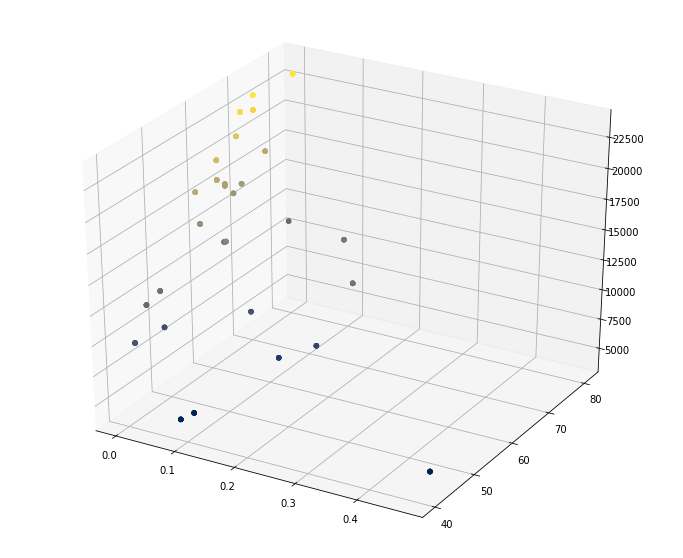

In [ ]:
fig = plt.figure(figsize=(12,10))
 
# defining the axes with the projection
# as 3D so as to plot 3D graphs
ax = plt.axes(projection="3d")

# ax.plot3D(X.iloc[:,1], X.iloc[:,2], y)
ax.scatter3D(X.iloc[:,1], X.iloc[:,2], y, c=y, cmap='cividis');
 
# Showing the above plot
plt.show()

In [ ]:
bicycles['average_temp'] = bicycles[['High Temp (°F)', 'Low Temp (°F)']].mean(axis=1)
bicycles['diff_temp'] = bicycles['High Temp (°F)'] - bicycles['Low Temp (°F)']
bicycles['weekend_temp'] = bicycles['High Temp (°F)']*bicycles['weekend']


In [ ]:
bicycles.columns

Index(['Unnamed: 0', 'Date', 'Day', 'High Temp (°F)', 'Low Temp (°F)',
       'Precipitation', 'Brooklyn Bridge', 'Manhattan Bridge',
       'Williamsburg Bridge', 'Queensboro Bridge', 'Total', 'weekend',
       'average_temp', 'diff_temp', 'weekend_temp'],
      dtype='object')

In [ ]:
bicycles.corr()

,Unnamed: 0,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total,weekend,average_temp,diff_temp,weekend_temp
Unnamed: 0,1.000000,0.068401,0.052638,-0.033753,0.100455,0.090544,0.096174,0.093183,0.095115,-0.004282,0.064373,0.040593,0.010248
High Temp (°F),0.068401,1.000000,0.805983,-0.334064,0.738824,0.727551,0.766709,0.737359,0.748040,-0.076106,0.958629,0.541711,0.066515
Low Temp (°F),0.052638,0.805983,1.000000,-0.142855,0.449257,0.461594,0.525649,0.475111,0.485360,-0.104966,0.941139,-0.060952,-0.010005
Precipitation,-0.033753,-0.334064,-0.142855,1.000000,-0.594789,-0.584712,-0.571189,-0.592933,-0.586797,0.001993,-0.259462,-0.360450,-0.020468
Brooklyn Bridge,0.100455,0.738824,0.449257,-0.594789,1.000000,0.983749,0.980156,0.977857,0.989459,-0.250859,0.637941,0.607868,-0.124331
Manhattan Bridge,0.090544,0.727551,0.461594,-0.584712,0.983749,1.000000,0.990223,0.985779,0.996428,-0.335629,0.637437,0.571341,-0.223196
Williamsburg Bridge,0.096174,0.766709,0.525649,-0.571189,0.980156,0.990223,1.000000,0.989541,0.996721,-0.290820,0.690601,0.546412,-0.169616
Queensboro Bridge,0.093183,0.737359,0.475111,-0.592933,0.977857,0.985779,0.989541,1.000000,0.993624,-0.276067,0.649537,0.568685,-0.148020
Total,0.095115,0.748040,0.485360,-0.586797,0.989459,0.996428,0.996721,0.993624,1.000000,-0.296154,0.660566,0.572141,-0.174711
weekend,-0.004282,-0.076106,-0.104966,0.001993,-0.250859,-0.335629,-0.290820,-0.276067,-0.296154,1.000000,-0.093937,0.020723,0.972334


##Combinations of features to include in our models

In [ ]:
features_1 = ['Precipitation', 'High Temp (°F)', 'weekend', 'Low Temp (°F)']
features_2 = ['Precipitation', 'High Temp (°F)', 'weekend']
features_3 = ['Precipitation', 'High Temp (°F)', 'weekend', 'diff_temp']
features_4 = ['Precipitation', 'High Temp (°F)', 'weekend', 'diff_temp', 'weekend_temp']

In [ ]:
bicycles.corr()

,Unnamed: 0,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total,weekend,average_temp,diff_temp,weekend_temp
Unnamed: 0,1.000000,0.068401,0.052638,-0.033753,0.100455,0.090544,0.096174,0.093183,0.095115,-0.004282,0.064373,0.040593,0.010248
High Temp (°F),0.068401,1.000000,0.805983,-0.334064,0.738824,0.727551,0.766709,0.737359,0.748040,-0.076106,0.958629,0.541711,0.066515
Low Temp (°F),0.052638,0.805983,1.000000,-0.142855,0.449257,0.461594,0.525649,0.475111,0.485360,-0.104966,0.941139,-0.060952,-0.010005
Precipitation,-0.033753,-0.334064,-0.142855,1.000000,-0.594789,-0.584712,-0.571189,-0.592933,-0.586797,0.001993,-0.259462,-0.360450,-0.020468
Brooklyn Bridge,0.100455,0.738824,0.449257,-0.594789,1.000000,0.983749,0.980156,0.977857,0.989459,-0.250859,0.637941,0.607868,-0.124331
Manhattan Bridge,0.090544,0.727551,0.461594,-0.584712,0.983749,1.000000,0.990223,0.985779,0.996428,-0.335629,0.637437,0.571341,-0.223196
Williamsburg Bridge,0.096174,0.766709,0.525649,-0.571189,0.980156,0.990223,1.000000,0.989541,0.996721,-0.290820,0.690601,0.546412,-0.169616
Queensboro Bridge,0.093183,0.737359,0.475111,-0.592933,0.977857,0.985779,0.989541,1.000000,0.993624,-0.276067,0.649537,0.568685,-0.148020
Total,0.095115,0.748040,0.485360,-0.586797,0.989459,0.996428,0.996721,0.993624,1.000000,-0.296154,0.660566,0.572141,-0.174711
weekend,-0.004282,-0.076106,-0.104966,0.001993,-0.250859,-0.335629,-0.290820,-0.276067,-0.296154,1.000000,-0.093937,0.020723,0.972334


In [ ]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

# Simple train test split

In [ ]:
r2 = []
MaE =[]
MSE = []
RMSE = []
MAPE = []

features = []
model_name = []

In [ ]:
for f in [features_1, features_2, features_3, features_4]:
  X = bicycles[f]
  y = bicycles[['Total']]

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
  model = LinearRegression()
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  
  r2.append(r2_score(y_test, y_pred))
  
  MaE.append(mean_absolute_error(y_test, y_pred))
  
  MSE.append(mean_squared_error(y_test, y_pred))
  RMSE.append(mean_squared_error(y_test, y_pred, squared=False))
  MAPE.append(mean_absolute_percentage_error(y_test, y_pred))

  features.append(f)
  model_name.append('linear')

In [ ]:
for f in [features_1, features_2, features_3, features_4]:
  X = bicycles[f]
  y = bicycles[['Total']]
  square_f = PolynomialFeatures(2)

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

  X_train_sq = square_f.fit_transform(X_train)
  X_test_sq = square_f.transform(X_test)
  model = LinearRegression()
  model.fit(X_train_sq, y_train)
  y_pred = model.predict(X_test_sq)
  
  r2.append(r2_score(y_test, y_pred))
  
  MaE.append(mean_absolute_error(y_test, y_pred))
  
  MSE.append(mean_squared_error(y_test, y_pred))
  RMSE.append(mean_squared_error(y_test, y_pred, squared=False))
  MAPE.append(mean_absolute_percentage_error(y_test, y_pred))

  features.append(f)
  model_name.append('linear')

In [ ]:
results = pd.DataFrame(r2).rename(columns={0:'R2_score'})
results['mae_KFold'] = MaE
results['MSE'] = MSE
results['RMSE'] = RMSE
results['MAPE'] = MAPE
results['features'] = features
results['Model'] = model_name

In [ ]:
results

,R2_score,mae_KFold,MSE,RMSE,MAPE,features,Model
0,0.794661,2016.947461,6.806574e+06,2608.941150,0.157140,"[Precipitation, High Temp (°F), weekend, Low T...",linear
1,0.780893,2034.650731,7.262936e+06,2694.983483,0.172850,"[Precipitation, High Temp (°F), weekend]",linear
2,0.794661,2016.947461,6.806574e+06,2608.941150,0.157140,"[Precipitation, High Temp (°F), weekend, diff_...",linear
3,0.795948,1976.290224,6.763906e+06,2600.751049,0.150425,"[Precipitation, High Temp (°F), weekend, diff_...",linear
4,0.865691,1724.042271,4.452065e+06,2109.991796,0.143251,"[Precipitation, High Temp (°F), weekend, Low T...",linear
5,0.829776,1764.718773,5.642574e+06,2375.410211,0.140618,"[Precipitation, High Temp (°F), weekend]",linear
6,0.865691,1724.042271,4.452065e+06,2109.991796,0.143251,"[Precipitation, High Temp (°F), weekend, diff_...",linear
7,0.886584,1444.441249,3.759492e+06,1938.940962,0.096339,"[Precipitation, High Temp (°F), weekend, diff_...",linear


# Using KFold

In [ ]:
r_score_KFold = []
mae_KFold =[]
mse_KFold = []
rmse_KFold = []
mape_KFold = []

features = []
model_name = []

In [ ]:
for f in [features_1, features_2, features_3, features_4]:
  X = bicycles[f]
  y = bicycles[['Total']]
  cv = KFold(n_splits=5, shuffle=True, random_state=42)
  r2 = []
  MaE = []
  MSE = []
  MAPE = []
  RMSE = []

  for tr, ts in cv.split(X,y):
    X_train, X_test, y_train, y_test = X.iloc[tr], X.iloc[ts], y.iloc[tr], y.iloc[ts]
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
  
    r2.append(r2_score(y_test, y_pred))
  
    MaE.append(mean_absolute_error(y_test, y_pred))
  
    MSE.append(mean_squared_error(y_test, y_pred))
    RMSE.append(mean_squared_error(y_test, y_pred, squared=False))
    MAPE.append(mean_absolute_percentage_error(y_test, y_pred))

  r_score_KFold.append(np.array(r2).mean())
  mae_KFold.append(np.array(MaE).mean())
  mse_KFold.append(np.array(MSE).mean())
  rmse_KFold.append(np.array(RMSE).mean())
  mape_KFold.append(np.array(MAPE).mean())
  features.append(f)
  model_name.append('linear')

In [ ]:
for f in [features_1, features_2, features_3, features_4]:
  X = bicycles[f]
  y = bicycles[['Total']]
  #define polynomial transformer
  square_f = PolynomialFeatures(2)
  #split the data into train and test sets
  

  for tr, ts in cv.split(X,y):
    X_train, X_test, y_train, y_test = X.iloc[tr], X.iloc[ts], y.iloc[tr], y.iloc[ts]
    model = LinearRegression()
    X_train_sq = square_f.fit_transform(X_train)
    X_test_sq = square_f.transform(X_test)
    model.fit(X_train_sq, y_train)
    y_pred = model.predict(X_test_sq)
  
    r2.append(r2_score(y_test, y_pred))
  
    MaE.append(mean_absolute_error(y_test, y_pred))
  
    MSE.append(mean_squared_error(y_test, y_pred))
    RMSE.append(mean_squared_error(y_test, y_pred, squared=False))
    MAPE.append(mean_absolute_percentage_error(y_test, y_pred))

  r_score_KFold.append(np.array(r2).mean())
  mae_KFold.append(np.array(MaE).mean())
  mse_KFold.append(np.array(MSE).mean())
  rmse_KFold.append(np.array(RMSE).mean())
  mape_KFold.append(np.array(MAPE).mean())
  features.append(f)
  model_name.append('Polynomial')

In [ ]:
for f in [features_1, features_2, features_3, features_4]:
  X = bicycles[f]
  y = bicycles[['Total']]
  #define polynomial transformer
  square_f = PolynomialFeatures(3)
  #split the data into train and test sets
  

  for tr, ts in cv.split(X,y):
    X_train, X_test, y_train, y_test = X.iloc[tr], X.iloc[ts], y.iloc[tr], y.iloc[ts]
    model = LinearRegression()
    X_train_sq = square_f.fit_transform(X_train)
    X_test_sq = square_f.transform(X_test)
    model.fit(X_train_sq, y_train)
    y_pred = model.predict(X_test_sq)
  
    r2.append(r2_score(y_test, y_pred))
  
    MaE.append(mean_absolute_error(y_test, y_pred))
  
    MSE.append(mean_squared_error(y_test, y_pred))
    RMSE.append(mean_squared_error(y_test, y_pred, squared=False))
    MAPE.append(mean_absolute_percentage_error(y_test, y_pred))

  r_score_KFold.append(np.array(r2).mean())
  mae_KFold.append(np.array(MaE).mean())
  mse_KFold.append(np.array(MSE).mean())
  rmse_KFold.append(np.array(RMSE).mean())
  mape_KFold.append(np.array(MAPE).mean())
  features.append(f)
  model_name.append('Polynomial_3')

In [ ]:
results_KFold = pd.DataFrame(r_score_KFold).rename(columns={0:'R2_score'})
results_KFold['mae_KFold'] = mae_KFold
results_KFold['MSE'] = mse_KFold
results_KFold['RMSE'] = rmse_KFold
results_KFold['MAPE'] = mape_KFold
results_KFold['features'] = features
results_KFold['Model'] = model_name

In [ ]:
results_KFold

,R2_score,mae_KFold,MSE,RMSE,MAPE,features,Model
0,0.739977,2051.013682,7.591413e+06,2742.230619,0.166890,"[Precipitation, High Temp (°F), weekend, Low T...",linear
1,0.721850,1991.440302,8.056986e+06,2818.612012,0.177531,"[Precipitation, High Temp (°F), weekend]",linear
2,0.739977,2051.013682,7.591413e+06,2742.230619,0.166890,"[Precipitation, High Temp (°F), weekend, diff_...",linear
3,0.748220,1967.755601,7.364880e+06,2702.835913,0.158456,"[Precipitation, High Temp (°F), weekend, diff_...",linear
4,0.799774,1781.025209,5.907448e+06,2404.026693,0.145328,"[Precipitation, High Temp (°F), weekend, Low T...",Polynomial
5,0.796097,1782.117918,5.991720e+06,2426.281034,0.145603,"[Precipitation, High Temp (°F), weekend]",Polynomial
6,0.809904,1735.162143,5.606294e+06,2346.015143,0.142253,"[Precipitation, High Temp (°F), weekend, diff_...",Polynomial
7,0.824215,1647.498635,5.194955e+06,2251.979250,0.131086,"[Precipitation, High Temp (°F), weekend, diff_...",Polynomial
8,0.853263,1388.659464,4.336396e+06,1910.997728,0.110052,"[Precipitation, High Temp (°F), weekend, Low T...",Polynomial_3
9,0.866930,1310.857750,3.934069e+06,1813.355933,0.102952,"[Precipitation, High Temp (°F), weekend]",Polynomial_3


In [ ]:
bicycles.shape

(203, 15)

In [ ]:
our_param_grid = {'max_depth':[2], 'min_samples_split': [4,5,6,8,20, 50, 80]}
model_tree = DecisionTreeRegressor()

In [ ]:
grid_model = GridSearchCV(model_tree, param_grid=our_param_grid)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
grid_model.fit(X_train, y_train)


GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [2],
                         'min_samples_split': [4, 5, 6, 8, 20, 50, 80]})

In [ ]:
grid_model.best_estimator_

DecisionTreeRegressor(max_depth=2, min_samples_split=4)

In [ ]:
y_pred_tree = grid_model.predict(X_test)

In [ ]:
r2_score(y_test, y_pred_tree)

0.8388256137058584

In [ ]:
mean_absolute_error(y_test, y_pred_tree)

428.06568590950957

In [ ]:
mean_absolute_percentage_error(y_test, y_pred_tree)

0.028762446117875717

In [ ]:
mean_squared_error(y_test, y_pred_tree)

508063.5016760345

In [ ]:
mean_squared_error(y_test, y_pred_tree, squared=False)

712.7857333561288